In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rc
import scipy.stats as stats
from scipy.stats import norm


%matplotlib inline

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['font.size'] = 15

In [ ]:
#assigning parameters for 4 different cases
#format:pi,mu1,mu,sig1,sig2

params=[[0.50,0.0,1.0,0.8,0.4],
        [0.50,0.2,0.8,0.8,0.4],
        [0.50,0.4,0.6,0.8,0.4],
        [0.50,0.48,0.52,0.8,0.4],]
    

In [ ]:
#generate row array of 5000 observations

def genObs(params, n= 5000):
    pi,mu1,mu2,sig1,sig2=params
    
    W=np.random.binomial(size=n,n=1,p=1-pi)
    Y1=np.random.normal(loc = mu1, scale=sig1, size=n)
    Y2=np.random.normal(loc = mu2, scale=sig2, size=n)
    X=W*Y1+(1-W)*Y2
    return X


In [ ]:
#use updatePi=False for no updates to pi

def est(x, startParams,case, runs=10000, convergence=False, epsilon=1e-6):
    
    pi_0,mu1_0,mu2_0,sig1_0,sig2_0 = startParams
    

    iter_convergence=0

            
    #Initializing lists for future storage
    pi_data=[]
    mu1_data=[]
    mu2_data=[]
    sig1_data=[]
    sig2_data=[]
    index=[]
    
    run=0 
    
    while (convergence == False and run<runs):      
    
        f1_0=lambda x:(1.0/sig1_0)*norm.pdf((x-mu1_0)/sig1_0)
        f2_0=lambda x:(1.0/sig2_0)*norm.pdf((x-mu2_0)/sig2_0)
        
        #Parameter Update
        r=pi_0*f2_0(x)/((1-pi_0)*f1_0(x)+pi_0*f2_0(x))
        
        mu1_cap=np.sum((1-r)*x)/np.sum(1-r)
        mu2_cap=np.sum(r*x)/np.sum(r)
        
        sig1_cap=np.sqrt(np.sum((1-r)*np.square(x-mu1_cap))/np.sum(1-r))
        sig2_cap=np.sqrt(np.sum(r*np.square(x-mu2_cap))/np.sum(r))
        
        pi_cap=np.mean(r)
        
        
        # Creating old and new parameter array
        theta_0=np.array([pi_0,mu1_0,mu2_0,sig1_0,sig2_0])
        theta_cap=np.array([pi_cap,mu1_cap,mu2_cap,sig1_cap,sig2_cap])
        
        #Convergence condition
        if (np.max(np.abs(theta_cap-theta_0))< epsilon):
            iter_convergence=run
            convergence=True
        
        else:
            pi_0,mu1_0,mu2_0,sig1_0,sig2_0=pi_cap,mu1_cap,mu2_cap,sig1_cap,sig2_cap
        
        #Storing parameter values
        
        mu1_data.append(mu1_cap)
        mu2_data.append(mu1_cap)
        sig1_data.append(sig1_cap)
        sig2_data.append(sig2_cap)
        pi_data.append(pi_cap)

        index.append(run)
        run = run +1

    
    if convergence==True and run!=runs:
        print("Iterations for convergence=",iter_convergence)
    else:
        print("Estimate has not converged yet, more runs needed")
    
    
    print(pi_cap,mu1_cap,mu2_cap,sig1_cap,sig2_cap)
    
    
    

    


    fig = plt.figure(figsize=(9,12))

    plt.subplot(3, 2, 1)
    plt.plot(index,mu1_data)
    plt.title("$\mu_1$ vs iterations")
    plt.xlabel("No of iterations")
    plt.ylabel("$\mu_1$")

    plt.subplot(3, 2, 3)
    plt.plot(index,mu2_data)
    plt.title(r"$\mu_{2}$ vs iterations")
    plt.xlabel("No of iterations")
    plt.ylabel(r"$\mu_{2}$")

    plt.subplot(3, 2, 2)
    plt.plot(index,sig1_data)
    plt.title(r"$\sigma_1$ vs iterations")
    plt.xlabel("No of iterations")
    plt.ylabel(r"$\sigma_1$ ")

    plt.subplot(3, 2, 4)
    plt.plot(index,sig2_data)
    plt.title(r"$\sigma_2$ vs iterations")
    plt.xlabel("No of iterations")
    plt.ylabel(r"$\sigma_2$ ")
    plt.tight_layout
    plt.subplot(3, 2, 5)
    plt.plot(index,pi_data)
    plt.title(r"$\pi$ vs iterations")
    plt.xlabel("No of iterations")
    plt.ylabel(r"$\pi$ ")
    plt.suptitle(f'Case [{case + 1}]: Learning curve with true parameters as {params[case]}')
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)
    # plt.suptitle(f'Case [{case + 1}]: Learning curve with true parameters as {params[case]}')
    plt.savefig(f'3_{case+1}.png')
    plt.show()

Iterations for convergence= 1261
0.5816192500536584 -0.17384395455338636 0.9711958848858412 0.7493812462325184 0.424660449952752


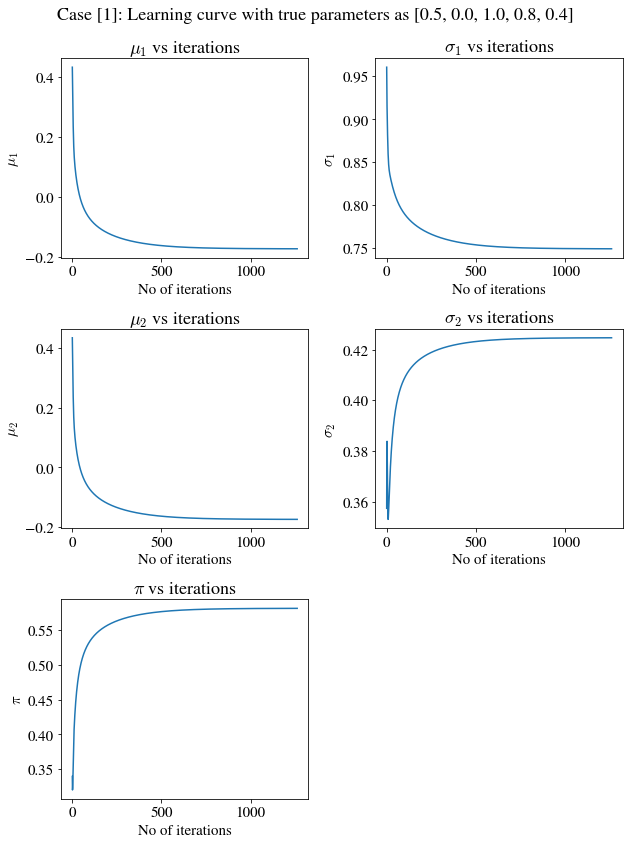

Iterations for convergence= 230
0.48625906080065334 0.2195486349170288 0.7883684895415676 0.8105744717058374 0.39285624617719755


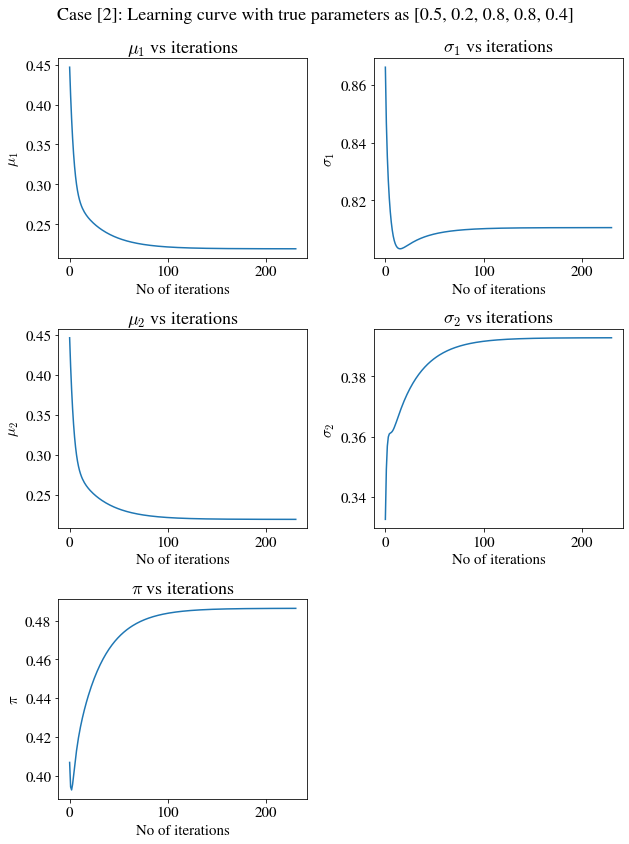

Iterations for convergence= 310
0.45792448852404594 0.4144813838981968 0.5938468438507224 0.789289262416924 0.3749123200429497


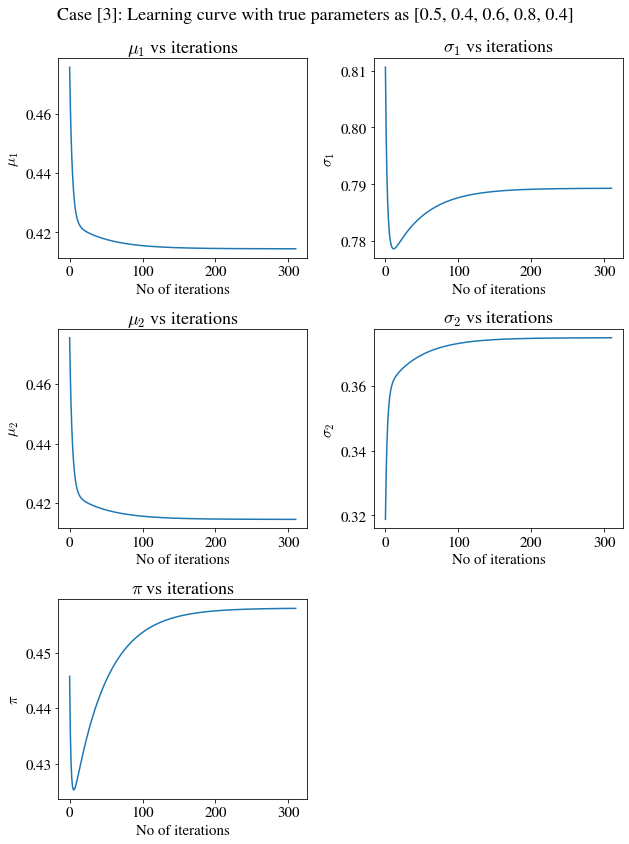

Iterations for convergence= 700
0.47457592416586686 0.4868724937817786 0.5265909823089036 0.769971539213776 0.40270601785824156


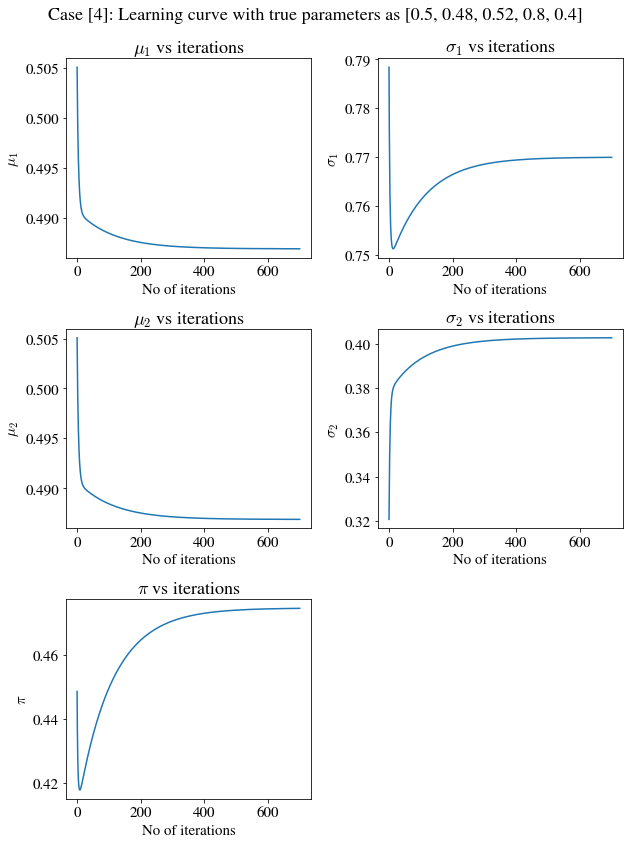

In [ ]:
n=5000  # no. of samples 
for i in range(4):
    X=genObs(params[i],n)
    est(X,[0.45,0.5,0.5,0.9,0.3],case=i)